In [1]:
from google.colab import files
uploaded = files.upload()


Saving road damage det.v4i.yolov8.zip to road damage det.v4i.yolov8.zip


In [2]:
!mkdir -p /content/dataset
!unzip -q "road damage det.v4i.yolov8.zip" -d /content/dataset


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:00


In [5]:
model_m_30 = YOLO("yolo11m.pt")
model_m_30.train(
    data="/content/dataset/data.yaml",
    epochs=30,
    imgsz=512,
    batch=4,
    device=0,
    name="m_epochs_30",
    workers=2
)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=m_epochs_30, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78603eec1220>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [6]:
res_m_30 = model_m_30.val(data="/content/dataset/data.yaml")

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1545.6±697.5 MB/s, size: 37.3 KB)
val: Scanning /content/dataset/valid/labels.cache... 783 images, 138 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 783/783 1.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 49/49 2.6it/s 19.0s
                   all        783       2330      0.715       0.68      0.706      0.469
    alligator cracking        379        592      0.797      0.755       0.83      0.656
         edge cracking        159        232      0.693      0.602       0.63      0.299
 longitudinal cracking        346        689      0.616       0.48      0.553      0.225
              patching        117        151       0.64      0.735      0.671      0.537
               rutting         97        1

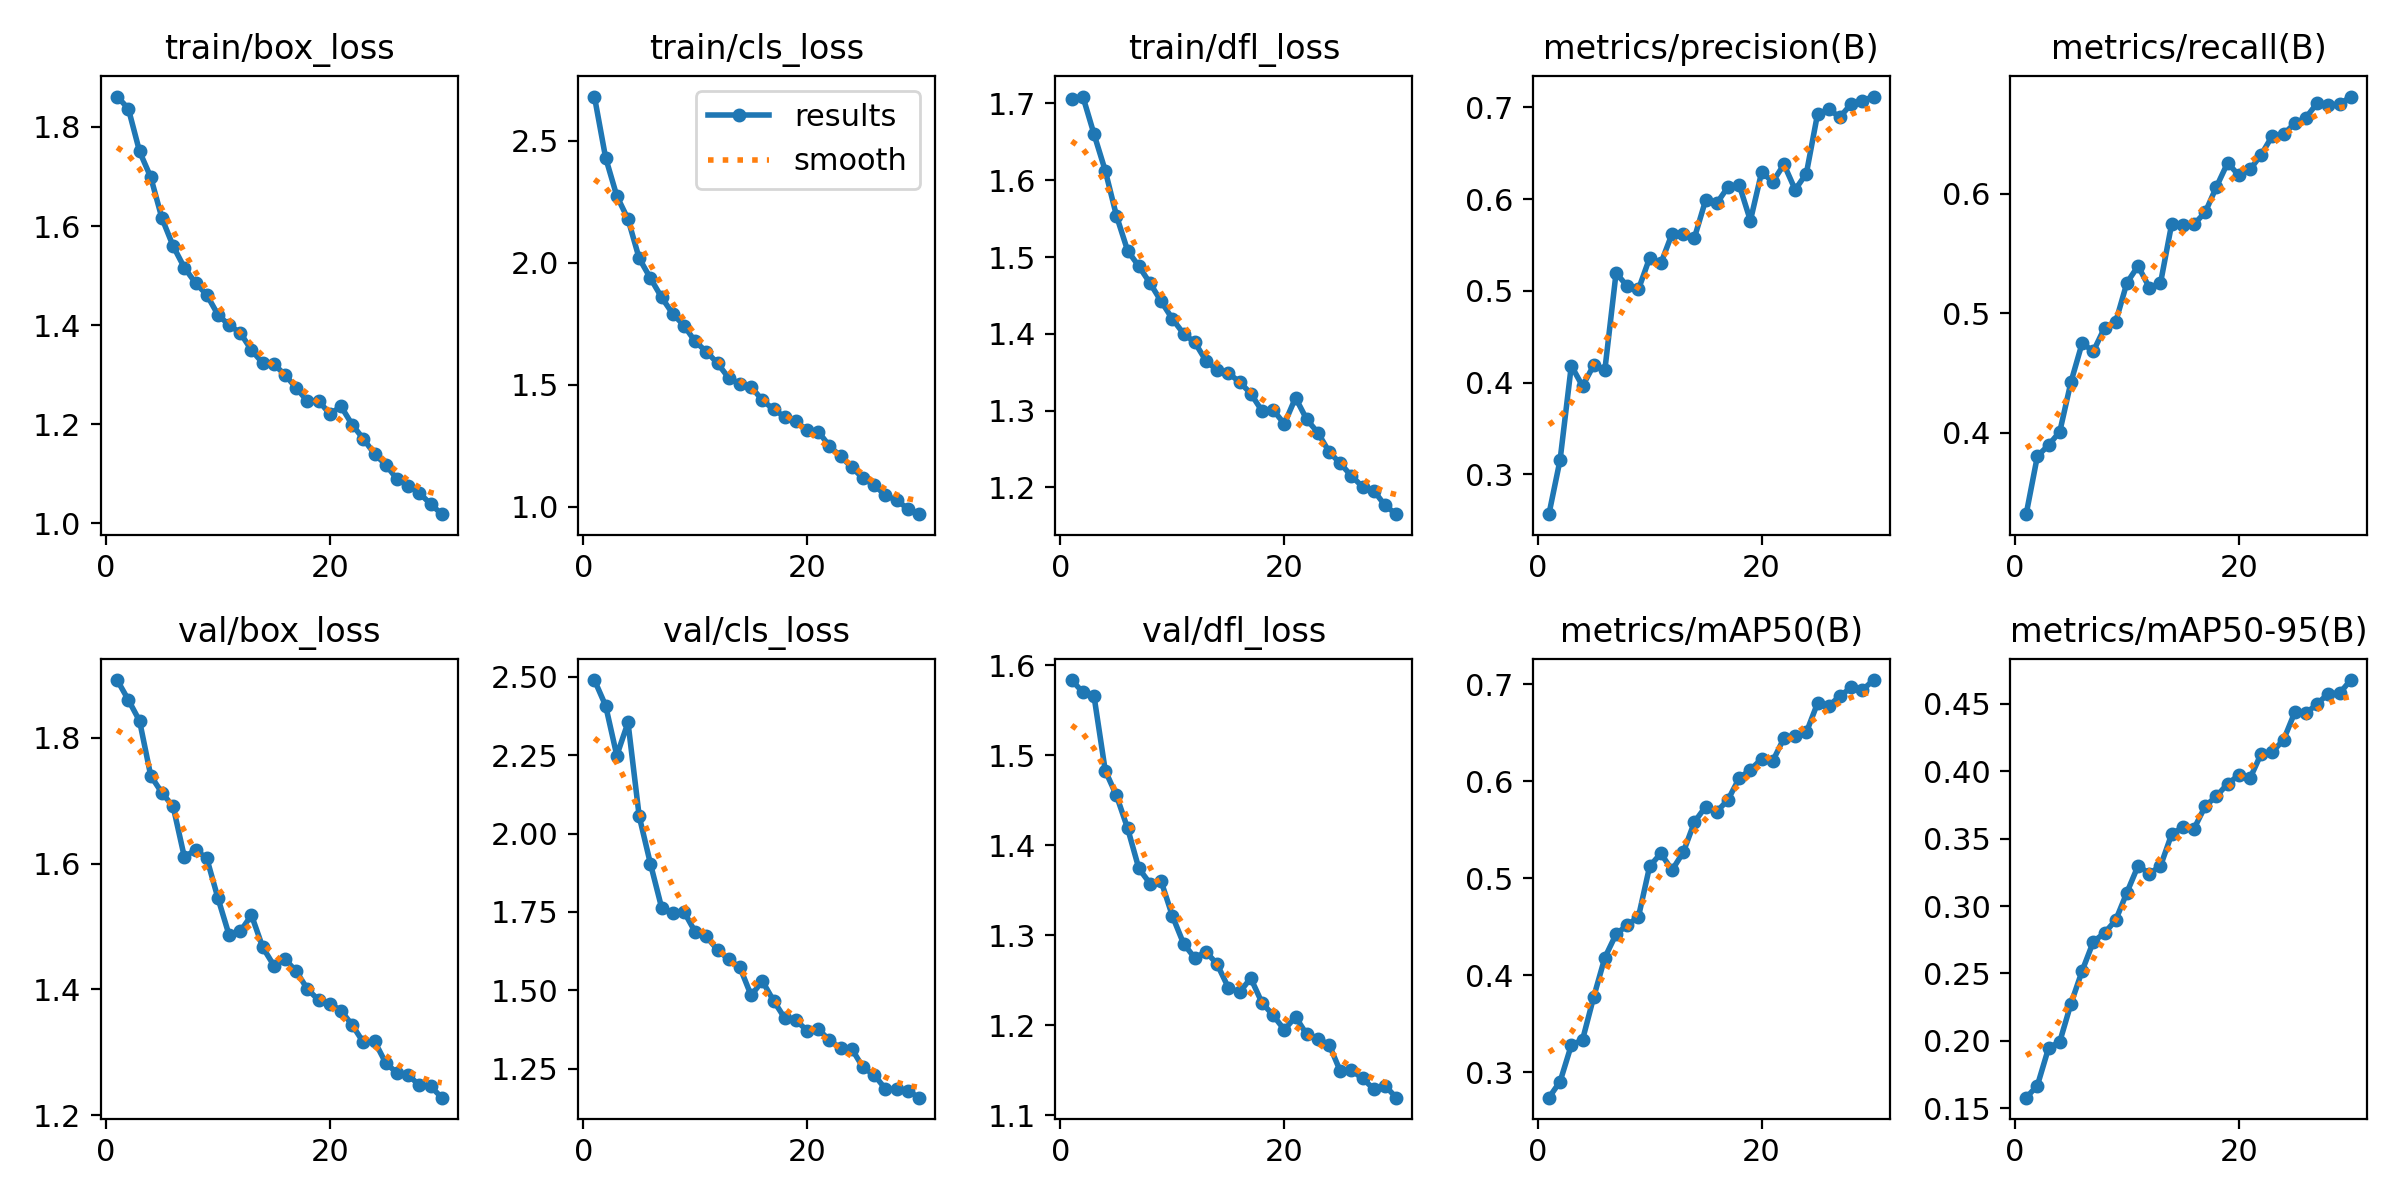

In [12]:
from IPython.display import Image

Image(filename="/content/runs/detect/m_epochs_30/results.png", width=700)


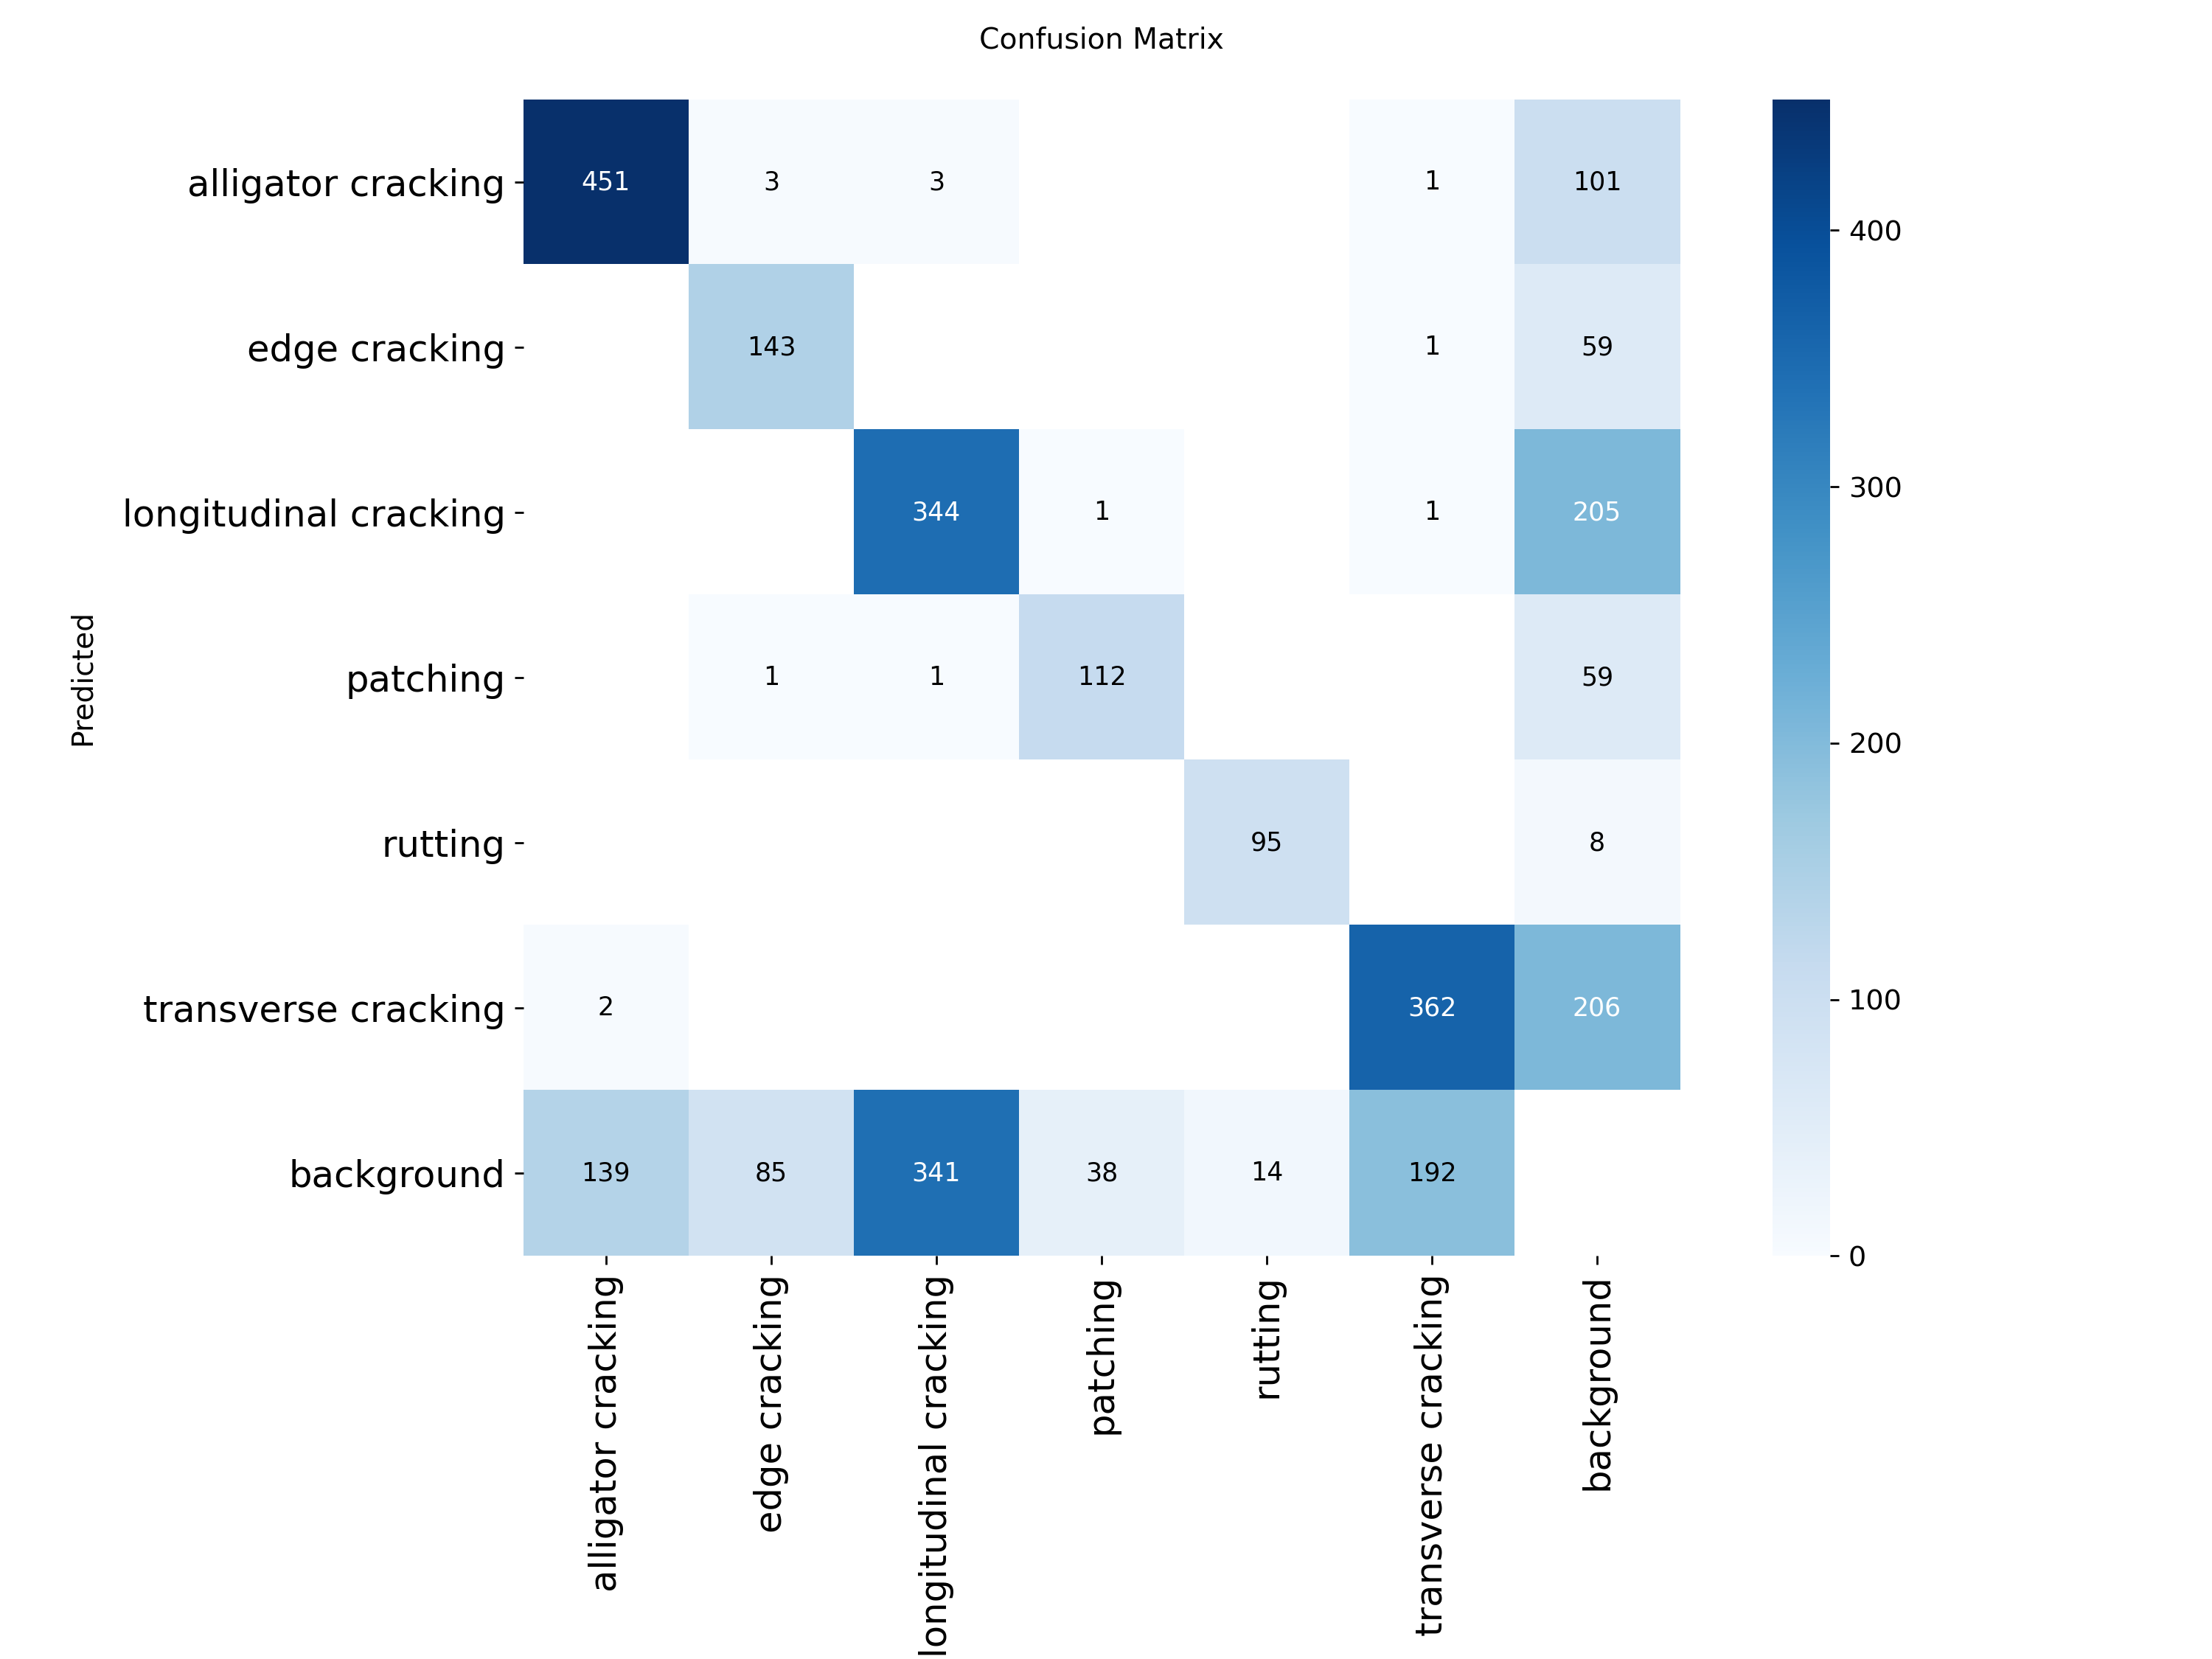

In [13]:
Image(filename="/content/runs/detect/m_epochs_30/confusion_matrix.png", width=700)


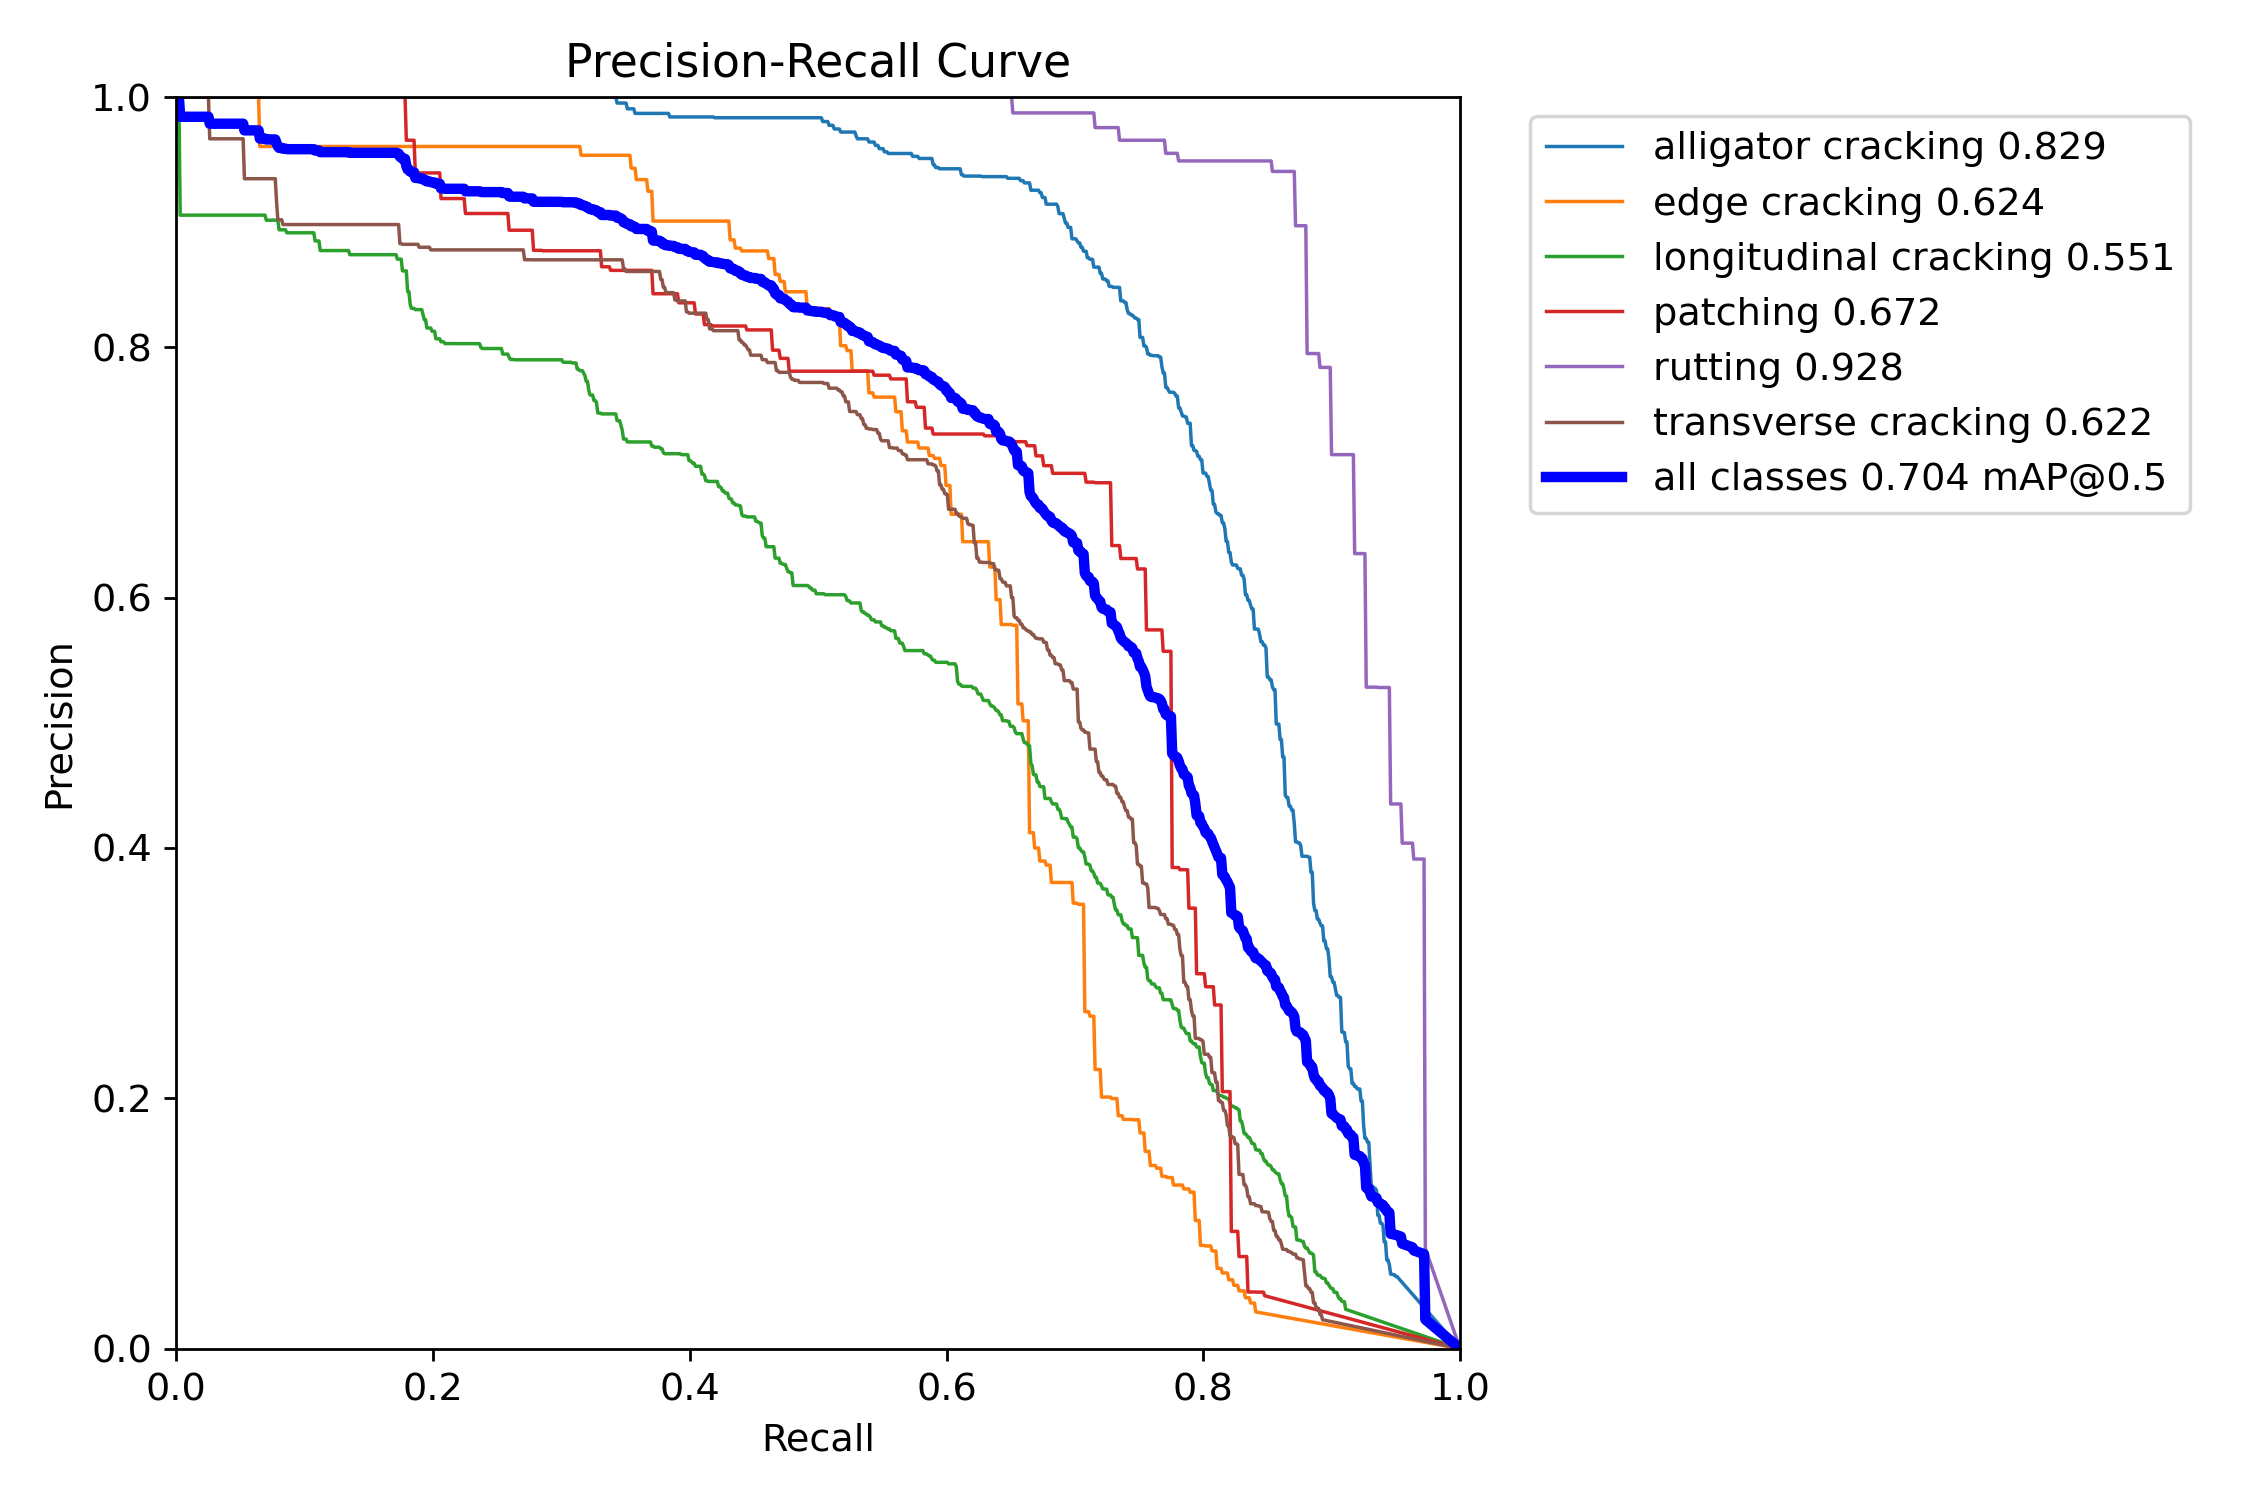

In [15]:
Image(filename="/content/runs/detect/m_epochs_30/BoxPR_curve.png", width=700)


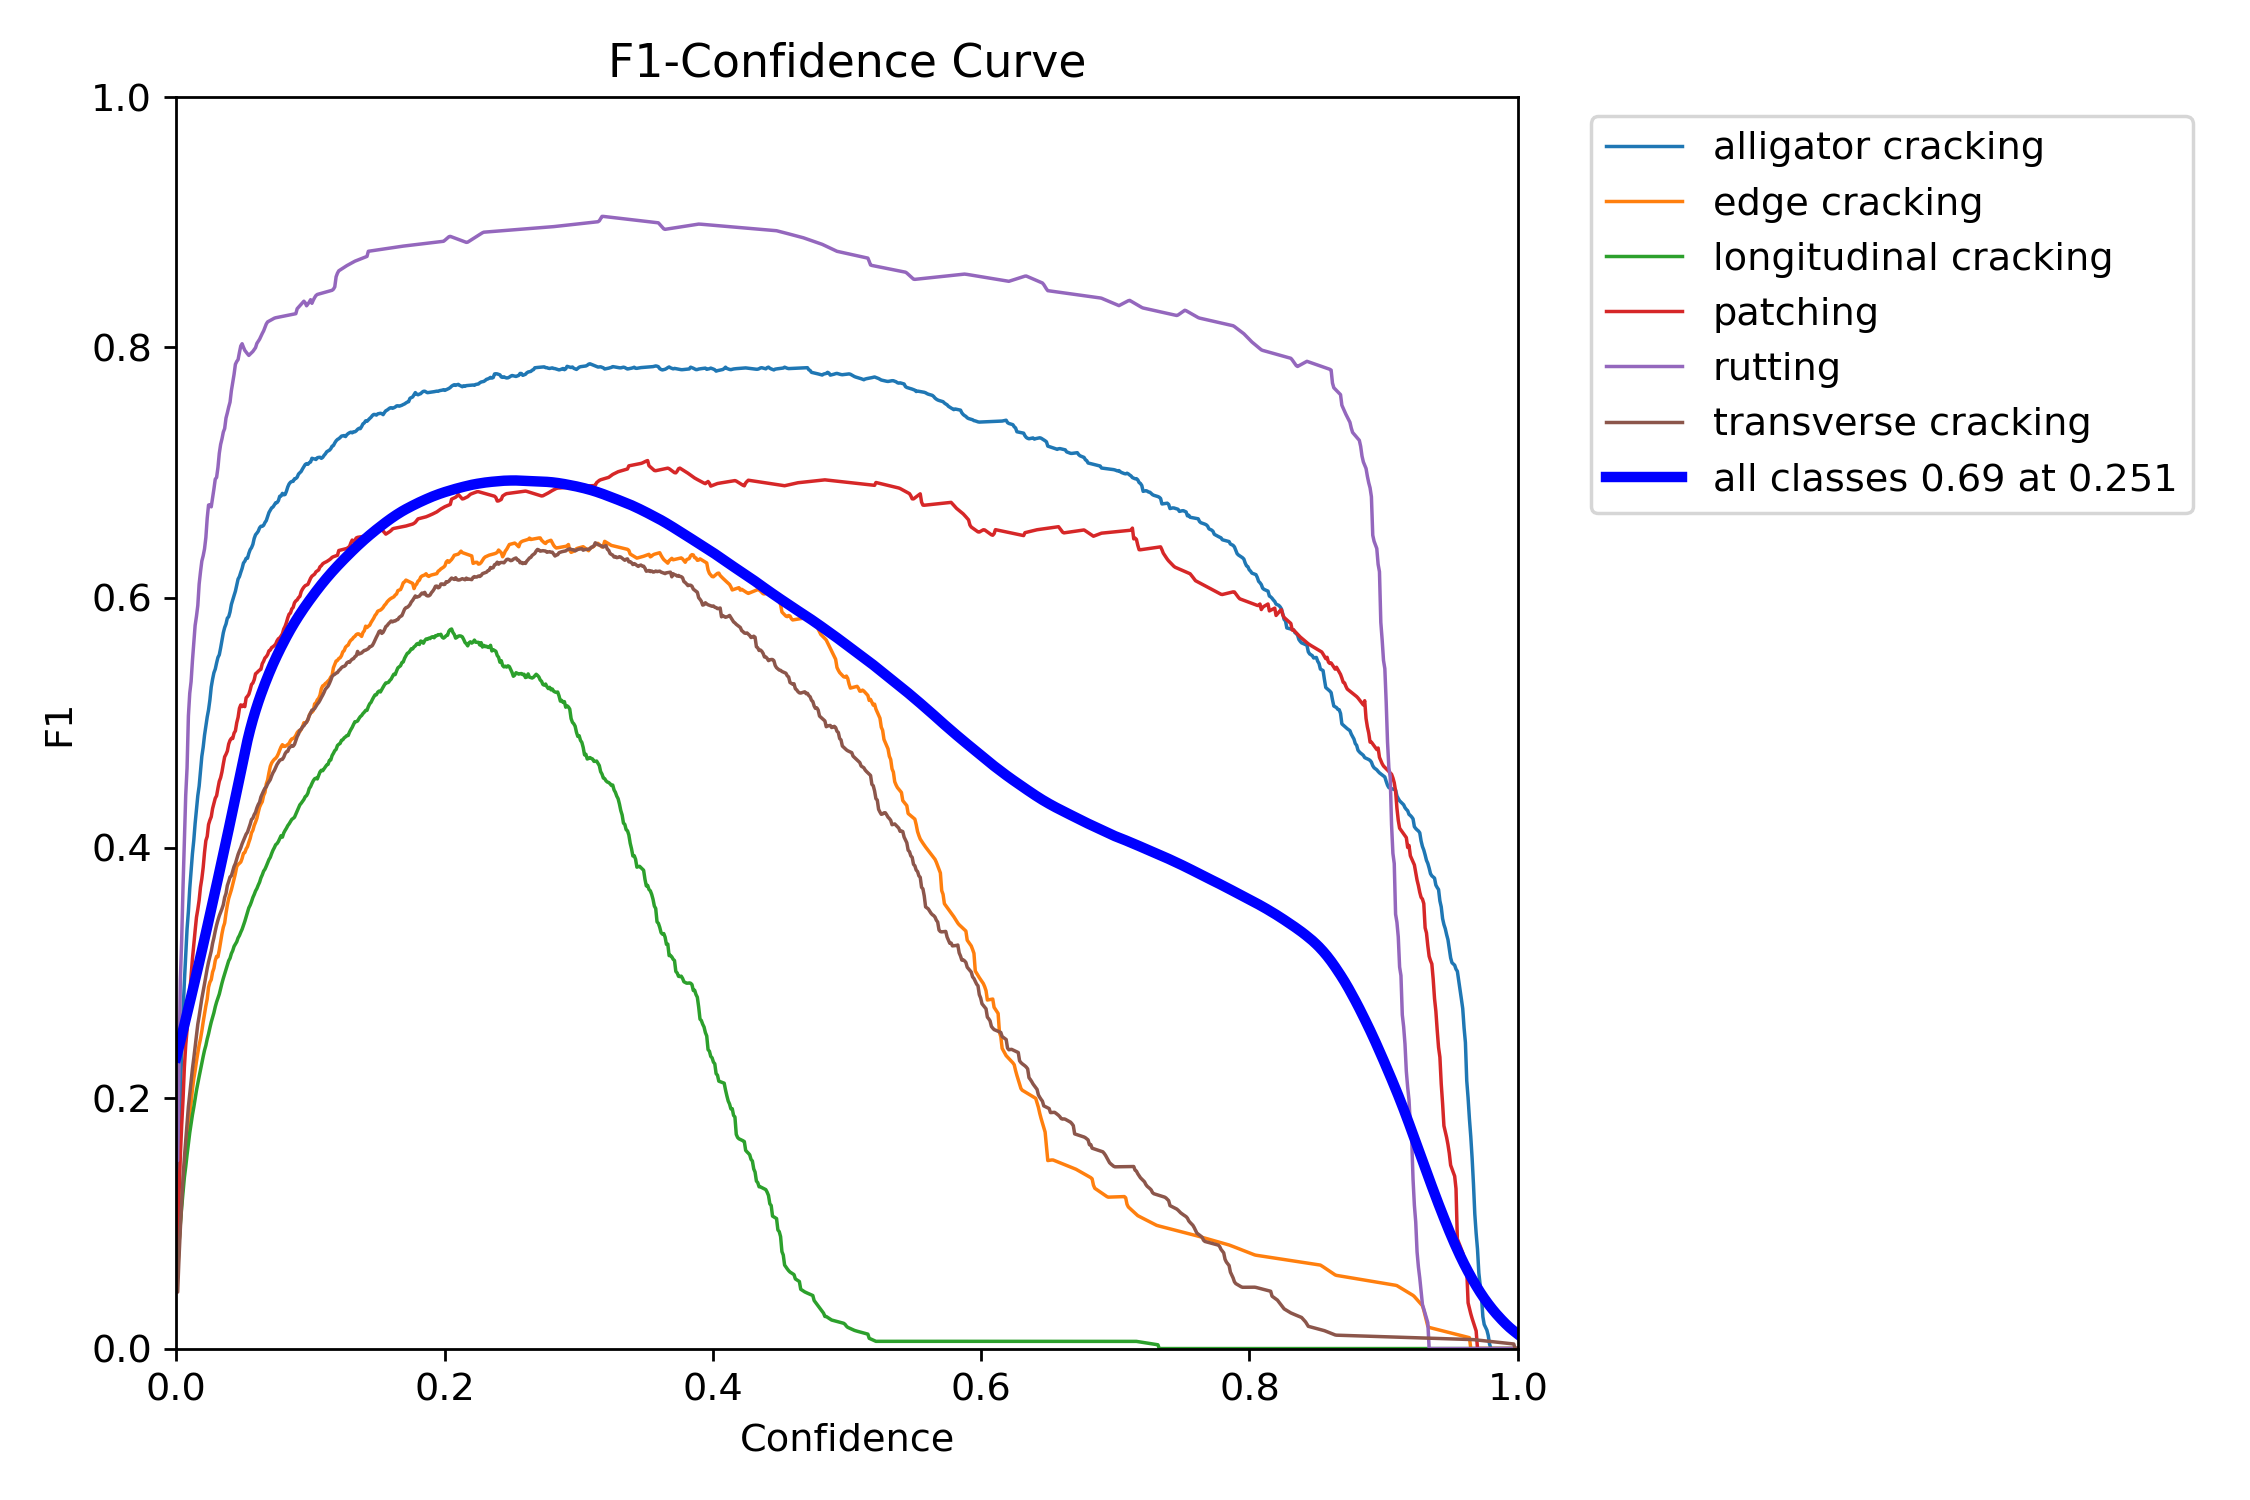

In [17]:
Image(filename="/content/runs/detect/m_epochs_30/BoxF1_curve.png", width=700)



image 1/1 /content/dataset/train/images/102769_jpg.rf.43d3ba2b865723426d09a7b04b22ce11.jpg: 512x512 2 edge crackings, 2 longitudinal crackings, 1 patching, 2 transverse crackings, 25.6ms
Speed: 2.3ms preprocess, 25.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

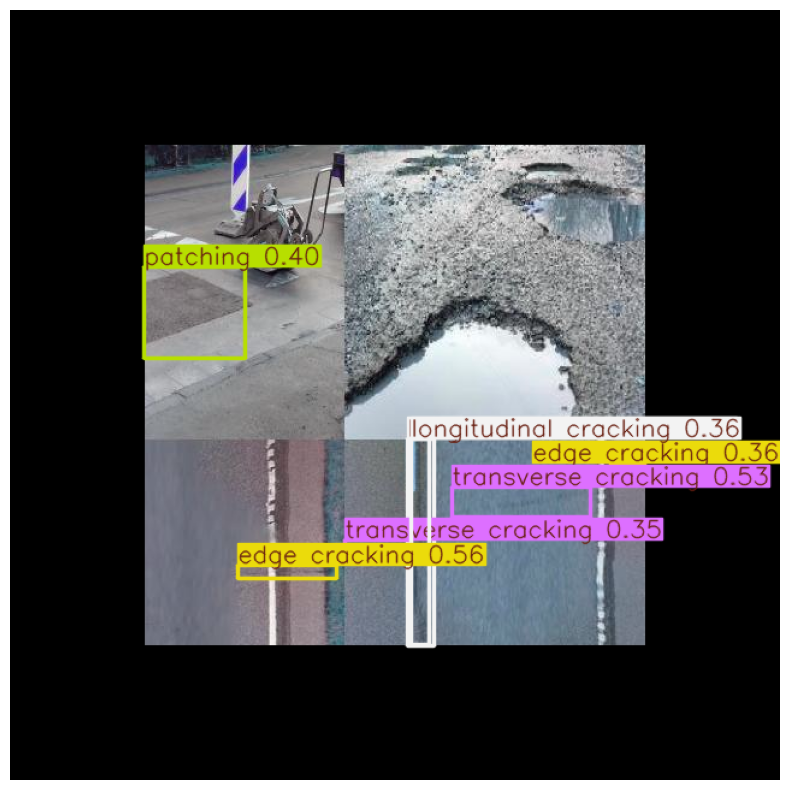

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/runs/detect/m_epochs_30/weights/best.pt")

img_path = "/content/dataset/train/images/102769_jpg.rf.43d3ba2b865723426d09a7b04b22ce11.jpg"   # <-- replace with filename
results = model(img_path)

plt.figure(figsize=(10,10))
plt.imshow(results[0].plot())
plt.axis('off')


In [20]:
import os
os.listdir("/content/dataset/test/images")[:10]


['us24-9-_jpg.rf.23c3ebc998531da5f62dc7ba378d808a.jpg',
 '36_jpg.rf.a70879c898a50b594deb6a9738c7beb4.jpg',
 'img-192_jpg.rf.a61b038a127a8c517b8150f9218dc86d.jpg',
 'gsv_375_jpg.rf.3c8ff5d8bd0432ae6972dc11bc060cb4.jpg',
 'img-619_jpg.rf.803b3c37116982bf4063df4487a32c5f.jpg',
 'img-595_jpg.rf.bef1ec4e331dd5a765ed280ff14e0703.jpg',
 'img-246_jpg.rf.ff93667b1429cc6882164206ddae8f9c.jpg',
 'img-644_jpg.rf.02c53abe3255d173d292c506e170ce25.jpg',
 'gsv_334_jpg.rf.1961c746e30fdab6106d3b060656646e.jpg',
 'gsv21-2-_jpg.rf.1291572dc38cabf500a95744870028c8.jpg']

In [22]:
model = YOLO("/content/runs/detect/m_epochs_30/weights/best.pt")
model.predict(
    source="/content/dataset/test/images",
    imgsz=512,
    conf=0.25,
    save=True,
    project="/content/runs/detect",
    name="m30_infer"
)



image 1/391 /content/dataset/test/images/12_jpg.rf.581e3d2ede69811df50b557ab6379824.jpg: 512x512 1 alligator cracking, 1 longitudinal cracking, 25.6ms
image 2/391 /content/dataset/test/images/17_jpg.rf.4d81ebeb51289dc3c80ac75c10a5ac7f.jpg: 512x512 1 rutting, 25.6ms
image 3/391 /content/dataset/test/images/24_jpg.rf.8a9354886e96191f4ba275a88f34dc7a.jpg: 512x512 2 alligator crackings, 24.2ms
image 4/391 /content/dataset/test/images/32_jpg.rf.90bf6d696934891c9b6fbc8f1abd9d10.jpg: 512x512 2 alligator crackings, 1 patching, 24.0ms
image 5/391 /content/dataset/test/images/35_jpg.rf.134c6a98fc80853f9c0593ea177c4288.jpg: 512x512 (no detections), 24.0ms
image 6/391 /content/dataset/test/images/36_jpg.rf.97d59aefcc811d1c53cbcf9822d982bb.jpg: 512x512 2 alligator crackings, 24.0ms
image 7/391 /content/dataset/test/images/36_jpg.rf.a70879c898a50b594deb6a9738c7beb4.jpg: 512x512 1 alligator cracking, 24.0ms
image 8/391 /content/dataset/test/images/39_jpg.rf.92073b1ba9b9d72834106a543710e044.jpg: 512x

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'alligator cracking', 1: 'edge cracking', 2: 'longitudinal cracking', 3: 'patching', 4: 'rutting', 5: 'transverse cracking'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
  

In [23]:
from google.colab import files
files.download('/content/runs/detect/m_epochs_30/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
!zip -r m30_infer.zip /content/runs/detect/m30_infer
files.download('m30_infer.zip')


  adding: content/runs/detect/m30_infer/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [27]:

!cp -r /content/runs/detect/m30_infer2 /content/drive/MyDrive/
